#### In this jupyter notebook, I made 125 clusters for all local business with the convenience score calculated by Ziyu as weight
#### And I created coverage area based on the cluster centers I generated

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import geopandas as gpd

In [2]:
# Import dataset that contains convenience score - the weight column (Ziyu made the file)
galveston_business = pd.read_csv("../data/galv_dist_detail.csv")
galveston_business

,Unnamed: 0,Name,Address,Coordinates,Lat,Long,fast_food,user_ratings_total,bakery,cafe,meal_delivery,meal_takeaway,restaurant,food,hours_open,weight
0,0,"Moody Gardens Hotel, Spa and Convention Center","7 Hope Boulevard, Galveston",POINT (-94.85032249999999 29.2734603),29.273460,-94.850323,0,0.000000,0,1,1,1,0,0,0.360119,7.220238
1,1,Rainforest Cafe,"5310 Seawall Boulevard, Galveston",POINT (-94.8202072 29.2707531),29.270753,-94.820207,0,0.449872,0,1,1,1,1,1,0.428571,12.307015
2,2,Landry's Prime Seafood & Steaks,"5310 Seawall Boulevard, Galveston",POINT (-94.8202317 29.2707352),29.270735,-94.820232,0,0.238552,0,1,1,1,1,1,0.428571,12.095695
3,3,Number 13 Prime Steak and Seafood,"7809 Broadway Street, Galveston",POINT (-94.85753559999999 29.2850878),29.285088,-94.857536,0,0.063072,0,1,1,1,1,1,0.273810,11.610691
4,4,Fisherman's Wharf,"2200 Harborside Drive, Galveston",POINT (-94.7936367 29.3089314),29.308931,-94.793637,0,0.342838,0,1,1,1,1,1,0.360119,12.063076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,408,Chevron Galveston,"601 Broadway Avenue J, Galveston",POINT (-94.7731482 29.3045091),29.304509,-94.773148,0,0.001221,0,1,1,1,0,1,1.000000,11.501221
409,409,Circle K/Valero,"628 Broadway Avenue J, Galveston",POINT (-94.7735891 29.30539089999999),29.305391,-94.773589,0,0.000000,0,1,1,1,0,0,0.360119,7.220238
410,410,Moody State School,Galveston,POINT (-94.8665867 29.2819039),29.281904,-94.866587,0,0.000000,0,1,1,1,0,0,0.360119,7.220238
411,411,Shell,"5027 Broadway Avenue J, Galveston",POINT (-94.8237905 29.2915092),29.291509,-94.823791,0,0.001404,0,1,1,1,0,1,0.360119,10.221642


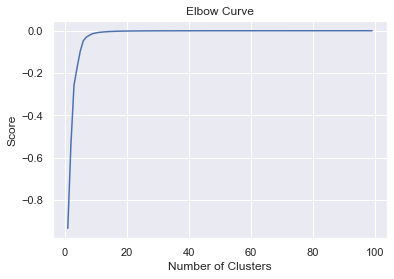

In [3]:
# Create an elbow plot to help us determine k
K_clusters = range(1,100)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = galveston_business[['Lat']]
X_axis = galveston_business[['Long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [4]:
# Perform kmean with 80 clusters with weight (convenience score)
kmeans = KMeans(n_clusters = 125, init ='k-means++')
kmeans.fit(galveston_business[["Lat","Long"]], sample_weight = galveston_business["weight"]) # Compute k-means clustering.
galveston_business['cluster_label'] = kmeans.fit_predict(galveston_business[["Lat","Long"]], sample_weight = galveston_business["weight"])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(galveston_business[["Lat","Long"]], sample_weight = galveston_business["weight"]) # Labels of each point
galveston_business.head(10)

,Unnamed: 0,Name,Address,Coordinates,Lat,Long,fast_food,user_ratings_total,bakery,cafe,meal_delivery,meal_takeaway,restaurant,food,hours_open,weight,cluster_label
0,0,"Moody Gardens Hotel, Spa and Convention Center","7 Hope Boulevard, Galveston",POINT (-94.85032249999999 29.2734603),29.273460,-94.850323,0,0.000000,0,1,1,1,0,0,0.360119,7.220238,18
1,1,Rainforest Cafe,"5310 Seawall Boulevard, Galveston",POINT (-94.8202072 29.2707531),29.270753,-94.820207,0,0.449872,0,1,1,1,1,1,0.428571,12.307015,99
2,2,Landry's Prime Seafood & Steaks,"5310 Seawall Boulevard, Galveston",POINT (-94.8202317 29.2707352),29.270735,-94.820232,0,0.238552,0,1,1,1,1,1,0.428571,12.095695,99
3,3,Number 13 Prime Steak and Seafood,"7809 Broadway Street, Galveston",POINT (-94.85753559999999 29.2850878),29.285088,-94.857536,0,0.063072,0,1,1,1,1,1,0.273810,11.610691,65
4,4,Fisherman's Wharf,"2200 Harborside Drive, Galveston",POINT (-94.7936367 29.3089314),29.308931,-94.793637,0,0.342838,0,1,1,1,1,1,0.360119,12.063076,74
5,5,The Spot,"3204 Seawall Boulevard, Galveston",POINT (-94.7980051 29.2836047),29.283605,-94.798005,0,0.771767,0,1,1,1,1,1,0.470238,12.712243,22
6,6,Shrimp N Stuff,"3901 Avenue O, Galveston",POINT (-94.8084087 29.2888755),29.288875,-94.808409,0,0.305349,0,1,1,1,1,1,0.360119,12.025587,84
7,7,Willie G's Seafood & Steaks,"2100 Harborside Drive, Galveston",POINT (-94.79280299999999 29.309303),29.309303,-94.792803,0,0.182440,0,1,1,1,1,1,0.360119,11.902678,74
8,8,Nick's Kitchen and Beach Bar,"3802 Seawall Boulevard, Galveston",POINT (-94.8040028 29.2797917),29.279792,-94.804003,0,0.215899,0,1,1,1,1,1,0.428571,12.073042,57
9,9,Gaido's,"3828 Seawall Boulevard, Galveston",POINT (-94.80449999999999 29.2796255),29.279626,-94.804500,0,0.331664,0,1,1,1,1,1,0.360119,12.051903,57


In [5]:
# Create geodataframe for the dataset
galveston_business_gdf = gpd.GeoDataFrame(
    galveston_business, geometry=gpd.points_from_xy(galveston_business.Long, galveston_business.Lat, crs='epsg:4326'),crs=4326) 

In [6]:
# Transform the 125 cluster centers to geodataframe for geojson generating
center_df = pd.DataFrame(centers, columns = ['lat','long'])
center_gdf = gpd.GeoDataFrame(
    center_df, geometry=gpd.points_from_xy(center_df.long, center_df.lat, crs='epsg:4326'),crs=4326) 
center_gdf

,lat,long,geometry
0,29.255390,-94.849056,POINT (-94.84906 29.25539)
1,29.875160,-95.770610,POINT (-95.77061 29.87516)
2,29.291711,-94.822667,POINT (-94.82267 29.29171)
3,29.220244,-94.964311,POINT (-94.96431 29.22024)
4,28.966447,-95.364985,POINT (-95.36499 28.96645)
...,...,...,...
120,29.282300,-94.813822,POINT (-94.81382 29.28230)
121,29.294334,-94.812414,POINT (-94.81241 29.29433)
122,29.269288,-94.829402,POINT (-94.82940 29.26929)
123,29.307440,-94.783258,POINT (-94.78326 29.30744)


In [13]:
# Create geodataframe for 125 buffer zone for geojson generating
buffer = center_gdf.buffer(0.002)
center_df_1 = center_df[:]
center_gdf_1 = gpd.GeoDataFrame(
    center_df_1, geometry=buffer,crs=4326) 

C:\Users\Charlie Qiu\AppData\Local\Temp\ipykernel_122848\3373100296.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer = center_gdf.buffer(0.002)


<AxesSubplot:>

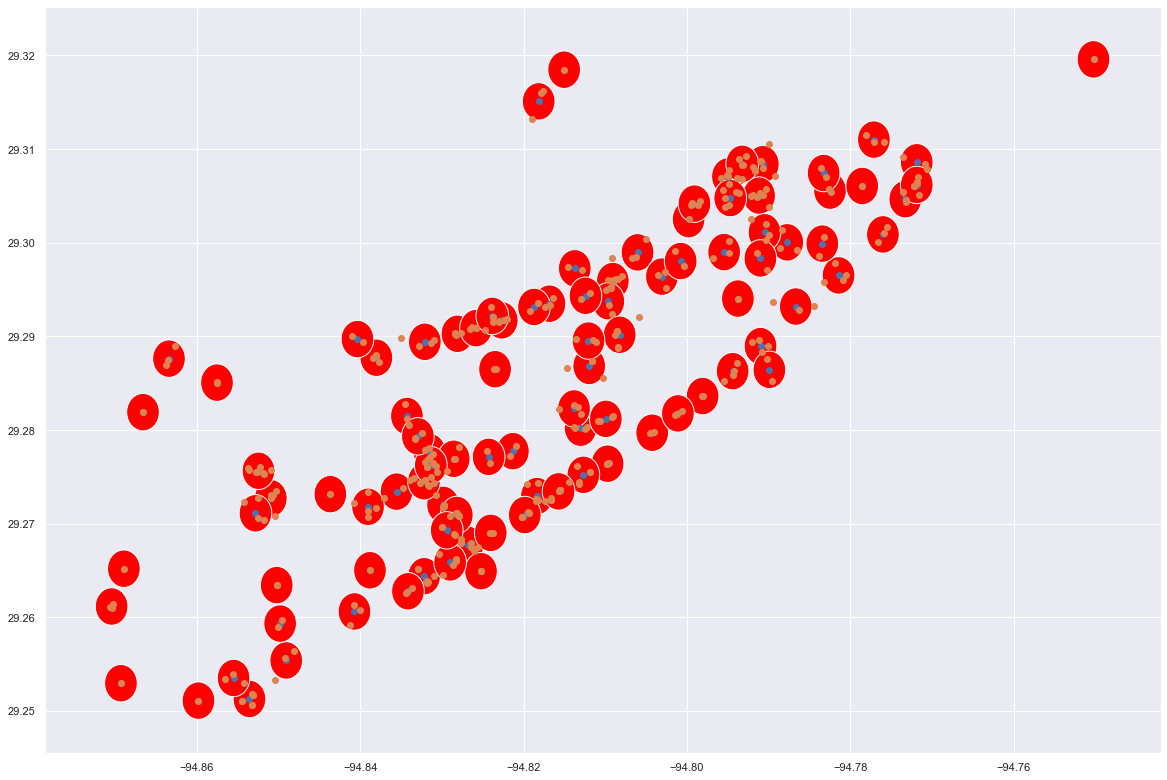

In [14]:
# Provide Visualization for current distribution points
fig, ax = plt.subplots(figsize=(20, 20))
center_gdf_1[(center_gdf_1["lat"]>=29.25) & (center_gdf_1["long"]>=-94.88) & (center_gdf_1["lat"]<=29.4)].plot(ax=ax,color="red")
center_gdf[(center_gdf["lat"]>=29.25) & (center_gdf["long"]>=-94.88) & (center_gdf["lat"]<=29.4)].plot(ax=ax)
galveston_business_gdf[(galveston_business_gdf["Lat"]>=29.25) & (galveston_business_gdf["Long"]>=-94.88) & (galveston_business_gdf["Lat"]<=29.4)].plot(ax=ax)

In [15]:
# Extract all the relevant columns
galveston_business_gdf = galveston_business_gdf.loc[:,["Name","Address","Coordinates","Lat","Long","geometry"]]
galveston_business_gdf

,Name,Address,Coordinates,Lat,Long,geometry
0,"Moody Gardens Hotel, Spa and Convention Center","7 Hope Boulevard, Galveston",POINT (-94.85032249999999 29.2734603),29.273460,-94.850323,POINT (-94.85032 29.27346)
1,Rainforest Cafe,"5310 Seawall Boulevard, Galveston",POINT (-94.8202072 29.2707531),29.270753,-94.820207,POINT (-94.82021 29.27075)
2,Landry's Prime Seafood & Steaks,"5310 Seawall Boulevard, Galveston",POINT (-94.8202317 29.2707352),29.270735,-94.820232,POINT (-94.82023 29.27074)
3,Number 13 Prime Steak and Seafood,"7809 Broadway Street, Galveston",POINT (-94.85753559999999 29.2850878),29.285088,-94.857536,POINT (-94.85754 29.28509)
4,Fisherman's Wharf,"2200 Harborside Drive, Galveston",POINT (-94.7936367 29.3089314),29.308931,-94.793637,POINT (-94.79364 29.30893)
...,...,...,...,...,...,...
408,Chevron Galveston,"601 Broadway Avenue J, Galveston",POINT (-94.7731482 29.3045091),29.304509,-94.773148,POINT (-94.77315 29.30451)
409,Circle K/Valero,"628 Broadway Avenue J, Galveston",POINT (-94.7735891 29.30539089999999),29.305391,-94.773589,POINT (-94.77359 29.30539)
410,Moody State School,Galveston,POINT (-94.8665867 29.2819039),29.281904,-94.866587,POINT (-94.86659 29.28190)
411,Shell,"5027 Broadway Avenue J, Galveston",POINT (-94.8237905 29.2915092),29.291509,-94.823791,POINT (-94.82379 29.29151)


In [10]:
# Create geojson for Galveston's local business
galveston_business_gdf.to_file("galveston_local_business_125.geojson", driver="GeoJSON")

In [11]:
# Create geojson for distribution point (cluster center)
center_gdf.to_file("galveston_distribution_centroid_125.geojson", driver="GeoJSON")

In [16]:
# Create geojson for distribution point's buffer zone (coverage are)
center_gdf_1.to_file("galveston_distribution_buffer_125.geojson",driver="GeoJSON")

####  I use QGIS and ArcGIS to finish mapping, the links are in the README file